Text Mining and Image Processing
Hoja de trabajo No4  
Luis Adolfo Martínez
Carné:
**22000352** 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint
import tensorflow as tf



In [2]:
import os.path
from os import path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

**Función para validar NA**

In [5]:
def validaNA(df):
  v = df.isnull().values.any()
  return v

**Cargamos los datos**

In [6]:
df_info = pd.read_csv("train.csv")     #pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', usecols=[2, 4, 5] , names=['FechaHora', 'Usuario', 'Twit'])
df_info.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_info.shape

(42000, 785)

# dividimos nuestro dataset

In [8]:
dfTrain, dfTest = train_test_split(df_info, test_size=0.30, random_state=7, shuffle=True)

In [9]:
dfTest.shape

(12600, 785)

In [10]:
dfTrain.shape


(29400, 785)

Separamos datos en x dejamos los pixeles y y la etiqueta 

In [11]:
xtrain = np.array(dfTrain.iloc[:,1:])
ytrain = np.array(dfTrain.iloc[:,0])

xtest = np.array(dfTest.iloc[:,1:])
ytest = np.array(dfTest.iloc[:,0])

In [12]:
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28))
xtest = xtest.reshape((xtest.shape[0], 28, 28))

In [13]:
def graficar(x,y,n):
  for i in range(n):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i], cmap='binary')
    plt.xlabel(y[i])
  return plt.show

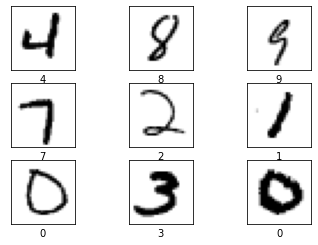

In [14]:
grafica = graficar(xtrain,ytrain,9)

In [15]:
# Escalado de las imagenes
xtrain = xtrain / 255
xtest = xtest / 255
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

## Artificial Neural Network (ANN)

In [16]:
check_ANN = ModelCheckpoint(filepath=direccion,
                             monitor = 'val_accuracy',
                             verbose=1, 
                             save_best_only=True,)

Definición del modelo

In [17]:
ModelANN = Sequential([
                        Flatten(input_shape = xtrain.shape[1:]),
                        Dense(units=1024, activation='relu', kernel_initializer='random_uniform'),
                        Dense(units=512, activation='relu', kernel_initializer='random_uniform'),
                        Dense(units=64, activation='relu', kernel_initializer='random_uniform'),
                        Dense(units=10, activation='softmax'),
])

In [18]:
ModelANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,362,122
Trainable params: 1,362,122
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento ANN

In [19]:
def Modelo(model,batch_size,epochs,Checkpoint,x,y):
  model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
  return model.fit(x, y, batch_size=batch_size, epochs=epochs,callbacks = [Checkpoint])


In [20]:
resultANN = Modelo(ModelANN,28,7,check_ANN,xtrain,ytrain)

Epoch 1/7
1050/1050 [==============================] - ETA: 0s - loss: 0.2622 - accuracy: 0.9207

1050/1050 [==============================] - 22s 20ms/step - loss: 0.2622 - accuracy: 0.9207
Epoch 2/7
1050/1050 [==============================] - ETA: 0s - loss: 0.1134 - accuracy: 0.9655

1050/1050 [==============================] - 14s 13ms/step - loss: 0.1134 - accuracy: 0.9655
Epoch 3/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9766

1050/1050 [==============================] - 14s 13ms/step - loss: 0.0751 - accuracy: 0.9766
Epoch 4/7
1047/1050 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9824

1050/1050 [==============================] - 14s 13ms/step - loss: 0.0600 - accuracy: 0.9824
Epoch 5/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9847

1050/1050 [==============================] - 14s 13ms/step - loss: 0.0469 - accuracy: 0.9847
Epoch 6/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9885

1050/1050 [==============================] - 14s 13ms/step - loss: 0.0361 - accuracy: 0.9885
Epoch 7/7
1047/1050 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9896

1050/1050 [==============================] - 14s 14ms/step - loss: 0.0330 - accuracy: 0.9896


Pruebas Modelo

In [21]:
result_ANN = ModelANN.evaluate(xtest, ytest, verbose=1)
print("Test loss:     ", round(result_ANN[0],4))
print("Test accuracy: ", round(result_ANN[1],4))

394/394 [==============================] - 2s 5ms/step - loss: 0.1167 - accuracy: 0.9748
Test loss:      0.1167
Test accuracy:  0.9748


Grabar modelo

In [22]:
ModelANN.save(direccion+'ANNModel1')  

Modelo CNN

In [23]:
check_CNN = ModelCheckpoint(filepath=direccion,
                             monitor = 'val_accuracy',
                             verbose=1, 
                             save_best_only=True,)

In [24]:
ModelCNN = Sequential([
                        Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=xtrain.shape[1:]),
                        MaxPool2D(pool_size=(2,2)),
                        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                        MaxPool2D(pool_size=(2,2)),
                        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                        MaxPool2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(units=128, activation='relu'),
                        Dense(units=10, activation='softmax'),
])


In [25]:
ModelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)        

## Entrenamiento del modelo CNN

In [26]:
resultCNN = Modelo(ModelCNN,28,7,check_CNN,xtrain,ytrain)

Epoch 1/7
1050/1050 [==============================] - ETA: 0s - loss: 0.3150 - accuracy: 0.8984

1050/1050 [==============================] - 79s 75ms/step - loss: 0.3150 - accuracy: 0.8984
Epoch 2/7
1050/1050 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9679

1050/1050 [==============================] - 78s 75ms/step - loss: 0.1019 - accuracy: 0.9679
Epoch 3/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9777

1050/1050 [==============================] - 78s 75ms/step - loss: 0.0689 - accuracy: 0.9777
Epoch 4/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9809

1050/1050 [==============================] - 78s 74ms/step - loss: 0.0576 - accuracy: 0.9809
Epoch 5/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9845

1050/1050 [==============================] - 78s 74ms/step - loss: 0.0473 - accuracy: 0.9845
Epoch 6/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9876

1050/1050 [==============================] - 78s 74ms/step - loss: 0.0377 - accuracy: 0.9876
Epoch 7/7
1050/1050 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9892

1050/1050 [==============================] - 78s 74ms/step - loss: 0.0337 - accuracy: 0.9892


Pruebas CNN

In [27]:
score_CNN = ModelCNN.evaluate(xtest, ytest, verbose=1)


394/394 [==============================] - 8s 20ms/step - loss: 0.0812 - accuracy: 0.9776


In [28]:
print("Test")
print("loss:     ", round(score_CNN[0],4))
print("accuracy: ", round(score_CNN[1],4))

Test
loss:      0.0812
accuracy:  0.9776


Comparativa

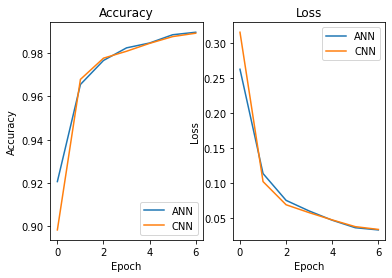

In [29]:
plt.subplot(1, 2, 1)
plt.plot(resultANN.history['accuracy'], label='ANN')
plt.plot(resultCNN.history['accuracy'], label='CNN')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resultANN.history['loss'], label='ANN')
plt.plot(resultCNN.history['loss'], label='CNN')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Prueba 2**

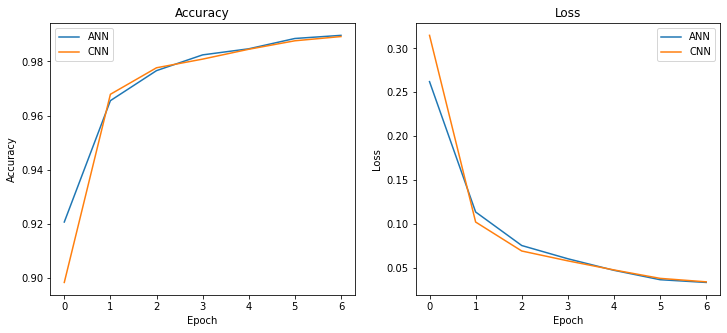

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(resultANN.history['accuracy'], label='ANN')
plt.plot(resultCNN.history['accuracy'], label='CNN')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resultANN.history['loss'], label='ANN')
plt.plot(resultCNN.history['loss'], label='CNN')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Conclusiones**

Se utilizaron 7 epochs, y se observo un comportamiento similar, pero se considera el que que tuvo mejor resultado por muy poco es el ANN
